In [64]:
import pandas as pd
import json
import os

current_dir = os.getcwd()
print("Current directory:", current_dir)

Current directory: /Users/tongchernhaw/Desktop/NEA Air


https://data.gov.sg/datasets?query=psi&page=1&resultId=d_fe37906a0182569d891506e815e819b7



In [65]:
with open ("response.json","r") as f:
    psi24hr = json.load(f)

In [66]:
df = pd.json_normalize(psi24hr)

print(df.head())

   code errorMsg                                data.regionMetadata  \
0     0           [{'name': 'west', 'labelLocation': {'latitude'...   

                                          data.items  
0  [{'date': '2024-07-25', 'updatedTimestamp': '2...  


Current reading

In [67]:
import requests
import pandas as pd

# Step 1: Define the API endpoint

url ="https://api-open.data.gov.sg/v2/real-time/api/psi"

# Step 2: Make the GET request
response = requests.get(url)
response.raise_for_status()  # raise error if request failed

# Step 3: Parse the JSON response
data = response.json()

print(data)
# Step 4: Extract readings from the first item
items = data["data"]["items"]
readings_list = []

for item in items:
    date = item["timestamp"]
    readings = item["readings"]["co_sub_index"]
    readings["timestamp"] = date
    readings_list.append(readings)

# Step 5: Create DataFrame
df = pd.DataFrame(readings_list)

print(df)


{'code': 0, 'data': {'regionMetadata': [{'name': 'west', 'labelLocation': {'latitude': 1.35735, 'longitude': 103.7}}, {'name': 'east', 'labelLocation': {'latitude': 1.35735, 'longitude': 103.94}}, {'name': 'central', 'labelLocation': {'latitude': 1.35735, 'longitude': 103.82}}, {'name': 'south', 'labelLocation': {'latitude': 1.29587, 'longitude': 103.82}}, {'name': 'north', 'labelLocation': {'latitude': 1.41803, 'longitude': 103.82}}], 'items': [{'date': '2025-07-10', 'updatedTimestamp': '2025-07-10T14:30:49+08:00', 'timestamp': '2025-07-10T14:00:00+08:00', 'readings': {'o3_sub_index': {'west': 5, 'east': 11, 'central': 5, 'south': 4, 'north': 10}, 'no2_one_hour_max': {'west': 21, 'east': 15, 'central': 12, 'south': 11, 'north': 16}, 'o3_eight_hour_max': {'west': 12, 'east': 26, 'central': 12, 'south': 11, 'north': 25}, 'psi_twenty_four_hourly': {'west': 54, 'east': 40, 'central': 52, 'south': 40, 'north': 47}, 'pm10_twenty_four_hourly': {'west': 24, 'east': 20, 'central': 23, 'south':

In [68]:

df.tail()


,west,east,central,south,north,timestamp
0,3,4,4,3,3,2025-07-10T14:00:00+08:00


In [69]:
row = df.iloc[0]

In [70]:
row

west                                 3
east                                 4
central                              4
south                                3
north                                3
timestamp    2025-07-10T14:00:00+08:00
Name: 0, dtype: object

In [71]:
df

,west,east,central,south,north,timestamp
0,3,4,4,3,3,2025-07-10T14:00:00+08:00


In [72]:
import requests
import pandas as pd

# Step 1: Define the API endpoint

url ="https://api-open.data.gov.sg/v2/real-time/api/psi/?date=2024-07-16"

# Step 2: Make the GET request
response = requests.get(url)
response.raise_for_status()  # raise error if request failed

# Step 3: Parse the JSON response
data = response.json()

print(data)
# Step 4: Extract readings from the first item
items = data["data"]["items"]
readings_list = []

for item in items:
    date = item["timestamp"]
    readings = item["readings"]["co_sub_index"]
    readings["timestamp"] = date
    readings_list.append(readings)

# Step 5: Create DataFrame
df = pd.DataFrame(readings_list)

print(df)

{'code': 0, 'data': {'regionMetadata': [{'name': 'west', 'labelLocation': {'latitude': 1.35735, 'longitude': 103.7}}, {'name': 'east', 'labelLocation': {'latitude': 1.35735, 'longitude': 103.94}}, {'name': 'central', 'labelLocation': {'latitude': 1.35735, 'longitude': 103.82}}, {'name': 'south', 'labelLocation': {'latitude': 1.29587, 'longitude': 103.82}}, {'name': 'north', 'labelLocation': {'latitude': 1.41803, 'longitude': 103.82}}], 'items': [{'date': '2024-07-16', 'updatedTimestamp': '2024-07-16T23:45:45+08:00', 'timestamp': '2024-07-16T23:00:00+08:00', 'readings': {'o3_sub_index': {'west': 12, 'east': 16, 'central': 13, 'south': 9, 'north': 5}, 'no2_one_hour_max': {'west': 18, 'east': 21, 'central': 30, 'south': 12, 'north': 14}, 'o3_eight_hour_max': {'west': 27, 'east': 37, 'central': 32, 'south': 20, 'north': 13}, 'psi_twenty_four_hourly': {'west': 60, 'east': 56, 'central': 57, 'south': 52, 'north': 52}, 'pm10_twenty_four_hourly': {'west': 32, 'east': 38, 'central': 40, 'south'

In [ ]:
print(df['west'])


0     3
1     3
2     3
3     3
4     3
5     3
6     3
7     3
8     3
9     4
10    4
11    4
12    4
13    4
14    4
15    4
16    4
17    4
18    4
19    3
20    3
21    3
22    3
23    3
Name: west, dtype: int64


In [ ]:
timestamp_index

['2024-07-25T23:00:00+08:00',
 '2024-07-25T22:00:00+08:00',
 '2024-07-25T21:00:00+08:00',
 '2024-07-25T20:00:00+08:00',
 '2024-07-25T19:00:00+08:00',
 '2024-07-25T18:00:00+08:00',
 '2024-07-25T17:00:00+08:00',
 '2024-07-25T16:00:00+08:00',
 '2024-07-25T15:00:00+08:00',
 '2024-07-25T14:00:00+08:00',
 '2024-07-25T13:00:00+08:00',
 '2024-07-25T12:00:00+08:00',
 '2024-07-25T11:00:00+08:00',
 '2024-07-25T10:00:00+08:00',
 '2024-07-25T09:00:00+08:00',
 '2024-07-25T08:00:00+08:00',
 '2024-07-25T07:00:00+08:00',
 '2024-07-25T06:00:00+08:00',
 '2024-07-25T05:00:00+08:00',
 '2024-07-25T04:00:00+08:00',
 '2024-07-25T03:00:00+08:00',
 '2024-07-25T02:00:00+08:00',
 '2024-07-25T01:00:00+08:00',
 '2024-07-25T00:00:00+08:00']

In [ ]:
import matplotlib.pyplot as plt

In [80]:
co_reading = df['west']
timestamp = df['timestamp']

co_reading


0     3
1     3
2     3
3     3
4     3
5     3
6     3
7     3
8     3
9     4
10    4
11    4
12    4
13    4
14    4
15    4
16    4
17    4
18    4
19    3
20    3
21    3
22    3
23    3
Name: west, dtype: int64

In [81]:
date

'2024-07-16T00:00:00+08:00'

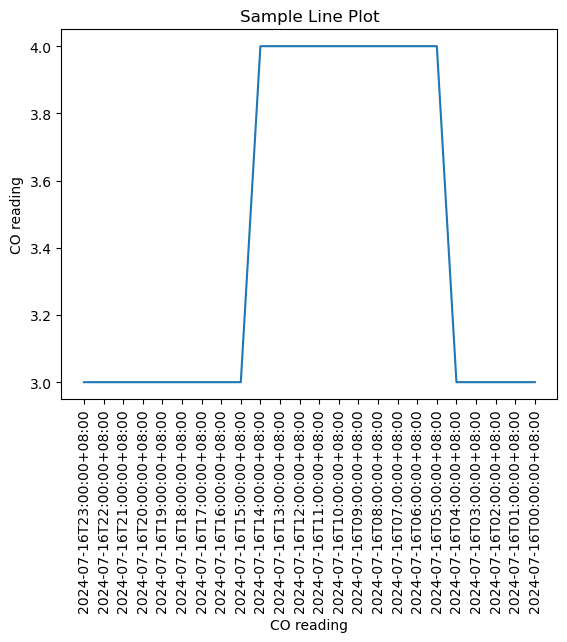

In [83]:

import matplotlib.pyplot as plt


# Create a line plot
plt.plot(timestamp, co_reading)

# Add labels and title
plt.xticks(rotation=90)
plt.xlabel("CO reading")
plt.ylabel("CO reading")
plt.title("Sample Line Plot")

# Show the plot
plt.show()
